In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [109]:
df = pd.read_csv('tcp-rotate_anterra-M1_positve_90.csv', skiprows=range(1, 15)).fillna(0)
#df = pd.read_csv('tcp-rotate_anterra-M1__negative_90-M1.csv', skiprows=range(1, 15)).fillna(0)

In [110]:
df.head()

,Time,Longitude,Latitude,Speed(km/h),5GNR-Q_NR_Serv SSB Index(P),5GNR-Q_NR_Serv BRSRP(P),5GNR-Q_NR_Serv SNR(P),5GNR-Q_NR_CQI WB(Mode)(P),5GNR-Q_NR_CQI WB(Avg)(P),5GNR-Q_NR_DL PDSCH TP(Total),...,5GNR-Q_NR_DL PDSCH TP(S1),5GNR-Q_NR_DL PDSCH TP(S2),5GNR-Q_NR_DL PDSCH TP(S3),5GNR-Q_NR_DL MAC(Total),5GNR-Q_NR_DL MAC TP(P),5GNR-Q_NR_DL MAC TP(S1),5GNR-Q_NR_DL MAC TP(S2),5GNR-Q_NR_DL MAC TP(S3),5GNR-Q_NR_DL RLC TP,5GNR-Q_NR_DL PDCP TP
0,05/06/2020 14:46:31.000,0.0,0.0,0.0,21,-45.53,18.79,15,15.0,1820.411,...,461.408,446.307,452.333,1651.878,417.483,418.924,405.265,410.206,1626.285,1618.579
1,05/06/2020 14:46:32.000,0.0,0.0,0.0,21,-45.54,17.86,15,15.0,1863.853,...,472.146,459.375,462.885,1692.012,426.272,428.406,417.044,420.290,1690.974,1683.030
2,05/06/2020 14:46:33.000,0.0,0.0,0.0,21,-45.68,17.13,15,15.0,1885.520,...,477.024,465.153,468.827,1711.147,430.779,432.784,422.390,425.193,1706.530,1698.625
3,05/06/2020 14:46:34.000,0.0,0.0,0.0,21,-45.73,18.12,15,15.0,1882.326,...,476.192,464.843,467.247,1708.145,430.031,432.283,421.789,424.042,1703.010,1695.076
4,05/06/2020 14:46:35.000,0.0,0.0,0.0,21,-45.76,18.65,15,15.0,1859.616,...,470.500,458.939,462.237,1687.502,424.907,427.100,416.248,419.247,1684.868,1676.911


In [111]:
SSB_Index = df['5GNR-Q_NR_Serv SSB Index(P)']
BRSRP = df['5GNR-Q_NR_Serv BRSRP(P)']
SNR = df['5GNR-Q_NR_Serv SNR(P)']
WB_CQI = df['5GNR-Q_NR_CQI WB(Mode)(P)']
WB_CQI_AVG = df['5GNR-Q_NR_CQI WB(Avg)(P)']

PDSCH_TOTAL = df['5GNR-Q_NR_DL PDSCH TP(Total)']
PDSCH_TP_PCELL = df ['5GNR-Q_NR_DL PDSCH TP(P)']
PDSCH_TP_S1 = df['5GNR-Q_NR_DL PDSCH TP(S1)']
PDSCH_TP_S2 = df['5GNR-Q_NR_DL PDSCH TP(S2)']
PDSCH_TP_S3 = df['5GNR-Q_NR_DL PDSCH TP(S3)']

DL_MAC_TP_TOTAL = df['5GNR-Q_NR_DL MAC(Total)']
DL_MAC_TP_PCELL = df['5GNR-Q_NR_DL MAC TP(P)']
DL_MAC_TP_S1 = df['5GNR-Q_NR_DL MAC TP(S1)']
DL_MAC_TP_S2 = df['5GNR-Q_NR_DL MAC TP(S2)']
DL_MAC_TP_S3 = df['5GNR-Q_NR_DL MAC TP(S3)']

DL_RLC_TP = df['5GNR-Q_NR_DL RLC TP']
DL_PDCP_TP= df['5GNR-Q_NR_DL PDCP TP']

# X-Axis: RSRP

In [112]:
xmarks=[i for i in range(1,len(BRSRP)+1,5)]
rsrp_steps = df.loc[xmarks]['5GNR-Q_NR_Serv BRSRP(P)']
#rsrp_steps

df_xaxis_rsrp = pd.DataFrame(rsrp_steps)
df_xaxis_rsrp.head(5)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


,5GNR-Q_NR_Serv BRSRP(P)
1,-45.54
6,-45.80
11,-45.90
16,-46.02
21,-46.09


# Tput vs RSRP

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


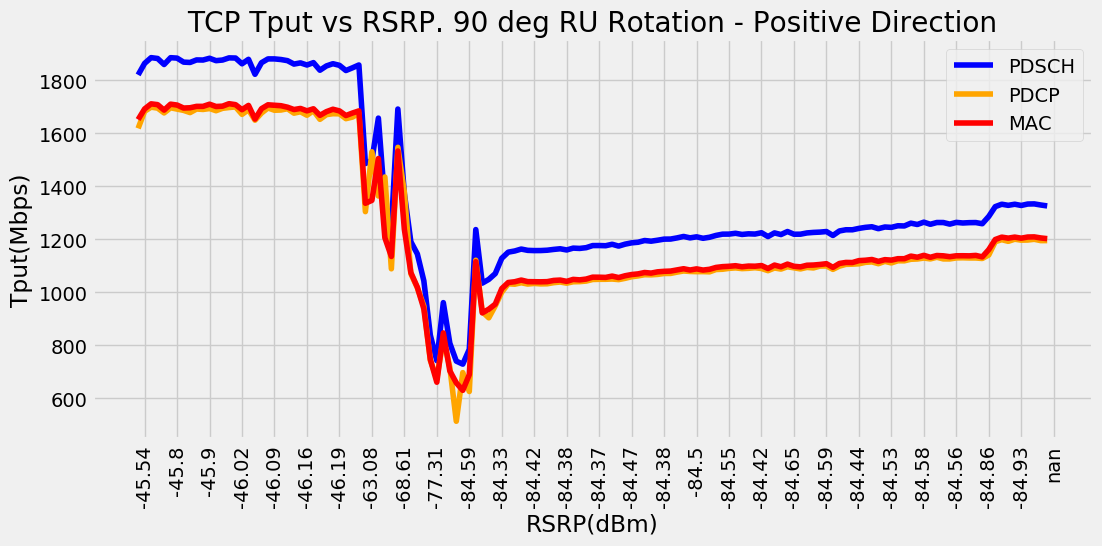

In [113]:
fig = plt.figure(figsize=(5,2), dpi=100) 
axes = fig.add_axes([1, 1, 2, 2]) 

axes.plot(PDSCH_TOTAL, label='PDSCH', color ='blue')
axes.plot(DL_PDCP_TP, label='PDCP', color ='orange')
axes.plot(DL_MAC_TP_TOTAL, label='MAC', color ='red')

plt.xticks(df_xaxis_rsrp.index,BRSRP[df_xaxis.index], rotation=90)

axes.set_title('TCP Tput vs RSRP. 90 deg RU Rotation - Positive Direction')
axes.set_xlabel('RSRP(dBm)')
axes.set_ylabel('Tput(Mbps)')
axes.legend()

# X-Axis:SNR

In [114]:
xmarks=[i for i in range(1,len(SNR)+1,5)]
snr_steps = df.loc[xmarks]['5GNR-Q_NR_Serv SNR(P)']
#snr_steps

df_xaxis_snr = pd.DataFrame(snr_steps)
df_xaxis_snr.head(5)


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


,5GNR-Q_NR_Serv SNR(P)
1,17.86
6,18.70
11,18.63
16,18.23
21,19.82


# Tput vs SNR

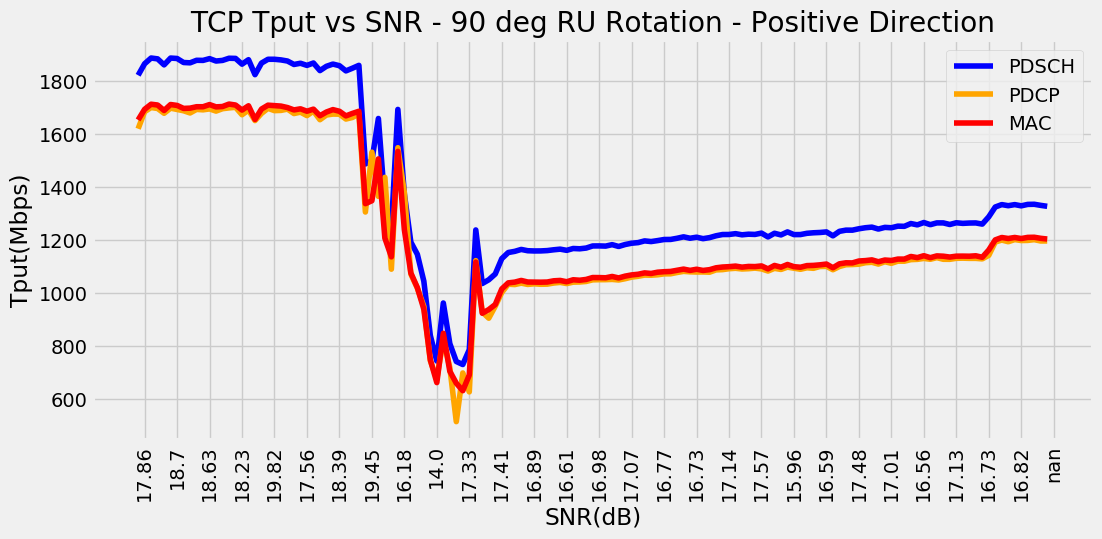

In [115]:
fig = plt.figure(figsize=(5,2), dpi=100) 
axes = fig.add_axes([1, 1, 2, 2]) 

axes.plot(PDSCH_TOTAL, label='PDSCH', color ='blue')
axes.plot(DL_PDCP_TP, label='PDCP', color ='orange')
axes.plot(DL_MAC_TP_TOTAL, label='MAC', color ='red')

plt.xticks(df_xaxis_snr.index,SNR[df_xaxis.index], rotation=90)

axes.set_title('TCP Tput vs SNR - 90 deg RU Rotation - Positive Direction')
axes.set_xlabel('SNR(dB)')
axes.set_ylabel('Tput(Mbps)')
axes.legend()

# CQI

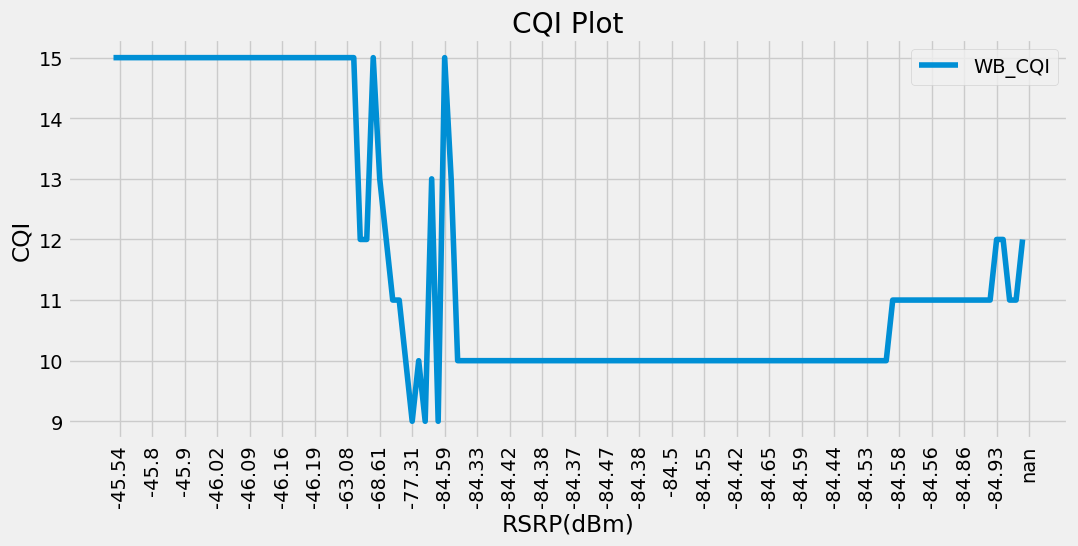

In [129]:
fig = plt.figure(figsize=(5,2), dpi=100) 
axes = fig.add_axes([0.8, 0.8, 2, 2]) 

#axes.plot(WB_CQI, label='WB_CQI', color ='orange')
axes.plot(WB_CQI, label='WB_CQI')
#axes.plot(WB_CQI_AVG, label='WB_CQI_AVG')

plt.xticks(df_xaxis_rsrp.index,BRSRP[df_xaxis.index], rotation=90)

axes.set_title('CQI Plot')
axes.set_ylabel('CQI')
axes.set_xlabel('RSRP(dBm)')
axes.legend()